In [2]:
import csv
from bs4 import BeautifulSoup

In [3]:
from selenium import webdriver

In [4]:
from selenium import webdriver
chrome_path = r"C:\Program Files\mine\chromedriver.exe"
driver = webdriver.Cfrom selenium import webdriverhrome(chrome_path)

In [7]:
url = 'http://www.amazon.com'
driver.get(url)

In [8]:
import requests

In [9]:
def get_url(search_term):
    template = 'https://www.amazon.com/s?k={}&crid=2C2JFIXCY64M7&sprefix=mi+%2Caps%2C443&ref=nb_sb_ss_ts-doa-p_1_3'
    search_term = search_term.replace(' ', '+')
    return template.format(search_term)

In [10]:
url = get_url('mi band 6')
print(url)

https://www.amazon.com/s?k=mi+band+6&crid=2C2JFIXCY64M7&sprefix=mi+%2Caps%2C443&ref=nb_sb_ss_ts-doa-p_1_3


In [11]:
driver.get(url)

In [12]:
link = 'https://www.amazon.com/Activity-Trackers-Temperature-Waterproof-Pedometer/dp/B08XZ68QFG/ref=sr_1_1_sspa?crid=2C2JFIXCY64M7&dchild=1&keywords=mi%2Bband%2B6&qid=1634402093&sprefix=mi%2B%2Caps%2C443&sr=8-1-spons&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyRkg3OTcyTDdBNDRGJmVuY3J5cHRlZElkPUEwNTMwNDA1MkRJWldaUkUyUkdYSyZlbmNyeXB0ZWRBZElkPUEwNTY0NTc3MUY4OTExR0dBS0xSRyZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU&th=1'

In [13]:
page = requests.get(link)

In [14]:
page

<Response [503]>

In [15]:
soup = BeautifulSoup(driver.page_source,'html.parser')

In [16]:
results = soup.find_all('div', {'data-component-type': 's-search-result'})

In [17]:
len(results)

22

In [18]:
names = soup.find_all('span',class_='a-profile-name')

In [19]:
names

[]

In [20]:
len(names)

0

In [21]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

[]

In [22]:
title = soup.find_all('a',class_='review-title-content')

In [23]:
title

[]

In [24]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

[]

In [25]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

In [26]:
review_title

[]

In [27]:
rating = soup.find_all('i',class_='review-rating')

In [28]:
rating

[]

In [29]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

[]

In [30]:
len(rate)

0

In [31]:
review = soup.find_all("div",{"data-hook":"review-collapsed"})
review

[]

In [32]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

[]

In [33]:
review_content[:] = [review.lstrip('\n') for review in review_content]
review_content

[]

In [34]:
review_content[:] = [review.rstrip('\n') for review in review_content]
review_content

[]

In [35]:
import pandas as pd 

In [36]:
df = pd.DataFrame()

In [37]:
df['Customer Name'] = cust_name
df

,Customer Name


In [38]:
df['Review Title'] = review_title
df['Review Rating'] = rate
df['Reviews'] = review_content

In [39]:
df

,Customer Name,Review Title,Review Rating,Reviews


In [40]:
df.to_csv(r'E:\Review.csv',index=True)

In [41]:
import pandas as pd
products = pd.read_csv('Review.csv')
products.head()

,Unnamed: 0,Customer Name,Review Title,Review Rating,Reviews
0,0,Tim Roberts,Ok for the price! UPDATE\n,5.0 out of 5 stars,Bought on for my wife and one for myself. Mi...
1,1,Lisa M. McLeod,Great little fitness tracker.\n,5.0 out of 5 stars,I only wanted something to track my steps. T...
2,2,Bauervision,Great fitness tracker starting point\n,4.0 out of 5 stars,It's one of the cheapest trackers out there ...
3,3,Bret Choitz,You get what you pay for... And dead in 2.5 Mo...,2.0 out of 5 stars,The price is good. I wanted a heart rate mo...
4,4,April Eubanks (Pick Me!),Save your time and frustration on this one\n,2.0 out of 5 stars,The tracker itself is never correct. My step...


In [42]:
import pandas as pd 
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import pandas as pd
data = pd.read_csv('Review.csv')
data = data.head(10)
data.dropna()

,Unnamed: 0,Customer Name,Review Title,Review Rating,Reviews
0,0,Tim Roberts,Ok for the price! UPDATE\n,5.0 out of 5 stars,Bought on for my wife and one for myself. Mi...
1,1,Lisa M. McLeod,Great little fitness tracker.\n,5.0 out of 5 stars,I only wanted something to track my steps. T...
2,2,Bauervision,Great fitness tracker starting point\n,4.0 out of 5 stars,It's one of the cheapest trackers out there ...
3,3,Bret Choitz,You get what you pay for... And dead in 2.5 Mo...,2.0 out of 5 stars,The price is good. I wanted a heart rate mo...
4,4,April Eubanks (Pick Me!),Save your time and frustration on this one\n,2.0 out of 5 stars,The tracker itself is never correct. My step...
5,5,Grandma BJ,Not real happy\n,3.0 out of 5 stars,I received my fitness tracker on August 4th ...
6,6,CJ,"Intuitive, light weight and does what it says ...",5.0 out of 5 stars,"I bought 3 of these watches as gifts, they a..."
7,7,Tammy French,Great item for the price\n,5.0 out of 5 stars,I was looking for an inexpensive fitness tra...


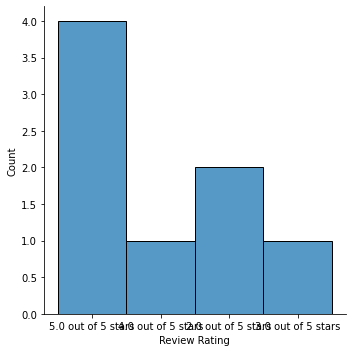

In [44]:
sns.displot(data['Review Rating'])

<AxesSubplot:xlabel='Review Rating', ylabel='count'>

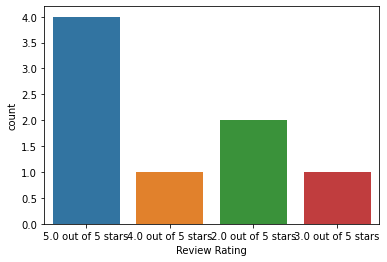

In [45]:
sns.countplot(x='Review Rating',data=data)

In [50]:
data['Reviews'][5]

'  I received my fitness tracker on August 4th and started the set up immediately.  While I do not like to leave bad reviews I have to list the problems I have encountered.  The app was easy to install but it did not want to link up with the tracker, after several tries I finally got them to sync.  I find that the only feature that works is the time, the step count is off, the temp is never close to being normal range and the BP should have me in the hospital with its ranges.  I am sure it is a bad unit as others seem to have no problem.  I do really like the sleekness of the tracker and the band is wonderful and fits perfect.  Unfortunately it will have to be returned.'

In [63]:
len(products) - len(products.dropna())

0

In [64]:
len(products)

8

In [120]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['Reviews']) != str:
        products.iloc[i]['Reviews'] = str(products.iloc[i]['Review'])

In [121]:
products = products[products['Review Rating'] != 3]

In [129]:
def sentiment(n):
        n=n.split(" ")[0]
        if float(n) >= 4: 
            return 1
        else:
            return 0
products['sentiment'] = products['Review Rating'].apply(sentiment)
products.head()

,Unnamed: 0,Customer Name,Review Title,Review Rating,Reviews,sentiment
0,0,Tim Roberts,Ok for the price! UPDATE\n,5.0 out of 5 stars,Bought on for my wife and one for myself. Mi...,1
1,1,Lisa M. McLeod,Great little fitness tracker.\n,5.0 out of 5 stars,I only wanted something to track my steps. T...,1
2,2,Bauervision,Great fitness tracker starting point\n,4.0 out of 5 stars,It's one of the cheapest trackers out there ...,1
3,3,Bret Choitz,You get what you pay for... And dead in 2.5 Mo...,2.0 out of 5 stars,The price is good. I wanted a heart rate mo...,0
4,4,April Eubanks (Pick Me!),Save your time and frustration on this one\n,2.0 out of 5 stars,The tracker itself is never correct. My step...,0


In [128]:
products["Review Rating" ].unique()

array(['5.0 out of 5 stars', '4.0 out of 5 stars', '2.0 out of 5 stars',
       '3.0 out of 5 stars'], dtype=object)

In [130]:
def combined_features(row):
    return row['Customer Name'] + ' '+ row['Review Rating']
products['all_features'] = products.apply(combined_features, axis=1)
products.head()

,Unnamed: 0,Customer Name,Review Title,Review Rating,Reviews,sentiment,all_features
0,0,Tim Roberts,Ok for the price! UPDATE\n,5.0 out of 5 stars,Bought on for my wife and one for myself. Mi...,1,Tim Roberts 5.0 out of 5 stars
1,1,Lisa M. McLeod,Great little fitness tracker.\n,5.0 out of 5 stars,I only wanted something to track my steps. T...,1,Lisa M. McLeod 5.0 out of 5 stars
2,2,Bauervision,Great fitness tracker starting point\n,4.0 out of 5 stars,It's one of the cheapest trackers out there ...,1,Bauervision 4.0 out of 5 stars
3,3,Bret Choitz,You get what you pay for... And dead in 2.5 Mo...,2.0 out of 5 stars,The price is good. I wanted a heart rate mo...,0,Bret Choitz 2.0 out of 5 stars
4,4,April Eubanks (Pick Me!),Save your time and frustration on this one\n,2.0 out of 5 stars,The tracker itself is never correct. My step...,0,April Eubanks (Pick Me!) 2.0 out of 5 stars


In [131]:
X = products['all_features']
y = products['sentiment']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [136]:
y_pred_class = model.predict(X_test_dtm)

In [138]:
accuracy_score(y_test, y_pred_class)

1.0